<a href="https://colab.research.google.com/github/dantv2002/PracticeML/blob/main/Face_eye_detection_openCV_haarcascade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download data
!wget "https://drive.usercontent.google.com/download?id=196liW7xlU92cpsA_n73APQaYCHI18FUI&export=download&confirm=t" -O haarcascade_eye.xml
!wget "https://drive.usercontent.google.com/download?id=1JzXGT_3BwKm6_GFLF-Rklx0dylGR1wMf&export=download&confirm=t" -O haarcascade_frontalface_default.xml

--2024-01-15 12:10:08--  https://drive.usercontent.google.com/download?id=196liW7xlU92cpsA_n73APQaYCHI18FUI&export=download&confirm=t
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.183.132, 2607:f8b0:4001:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.183.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341406 (333K) [application/octet-stream]
Saving to: ‘haarcascade_eye.xml’

haarcascade_eye.xml 100%[===================>] 333.40K  --.-KB/s    in 0.003s  

2024-01-15 12:10:08 (93.2 MB/s) - ‘haarcascade_eye.xml’ saved [341406/341406]

--2024-01-15 12:10:08--  https://drive.usercontent.google.com/download?id=1JzXGT_3BwKm6_GFLF-Rklx0dylGR1wMf&export=download&confirm=t
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.183.132, 2607:f8b0:4001:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.183.132|:443... connected.
HT

In [2]:
import cv2
from google.colab.patches import cv2_imshow
import urllib
import numpy as np

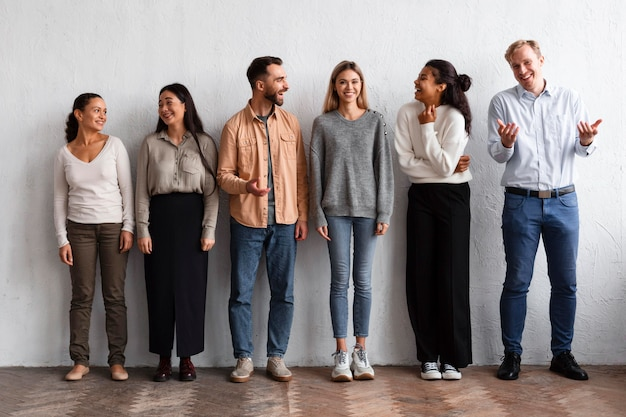

(417, 626, 3)

In [3]:
def load_img_from_URL(url):
  req = urllib.request.urlopen(url)
  arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
  img = cv2.imdecode(arr, -1) # 'Load it as it is'
  return img

img = load_img_from_URL("https://img.freepik.com/free-photo/front-view-smiley-people-group-therapy-session_23-2148752041.jpg")
cv2_imshow(img)
img.shape

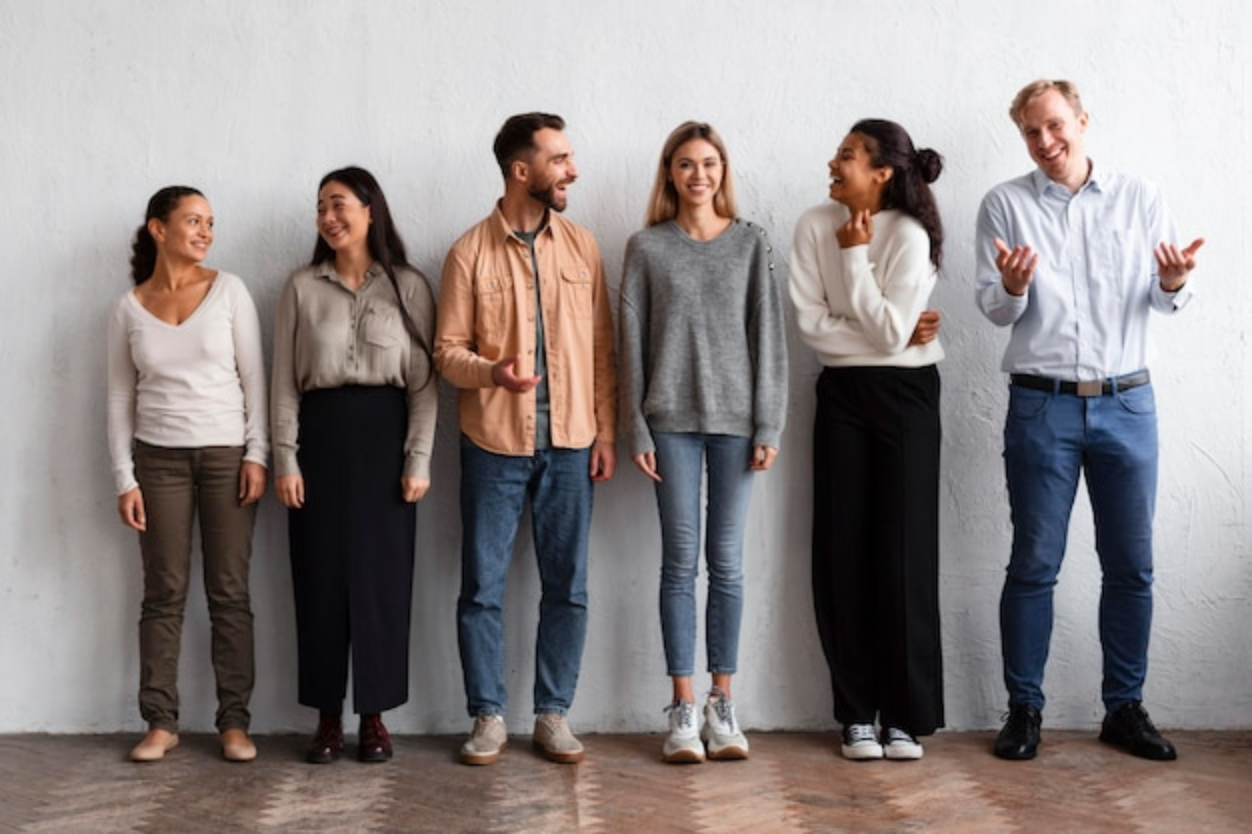

(834, 1252, 3)

In [4]:
scale = 2
image = cv2.resize(img, (img.shape[1]*scale, img.shape[0]*scale))
cv2_imshow(image)
image.shape

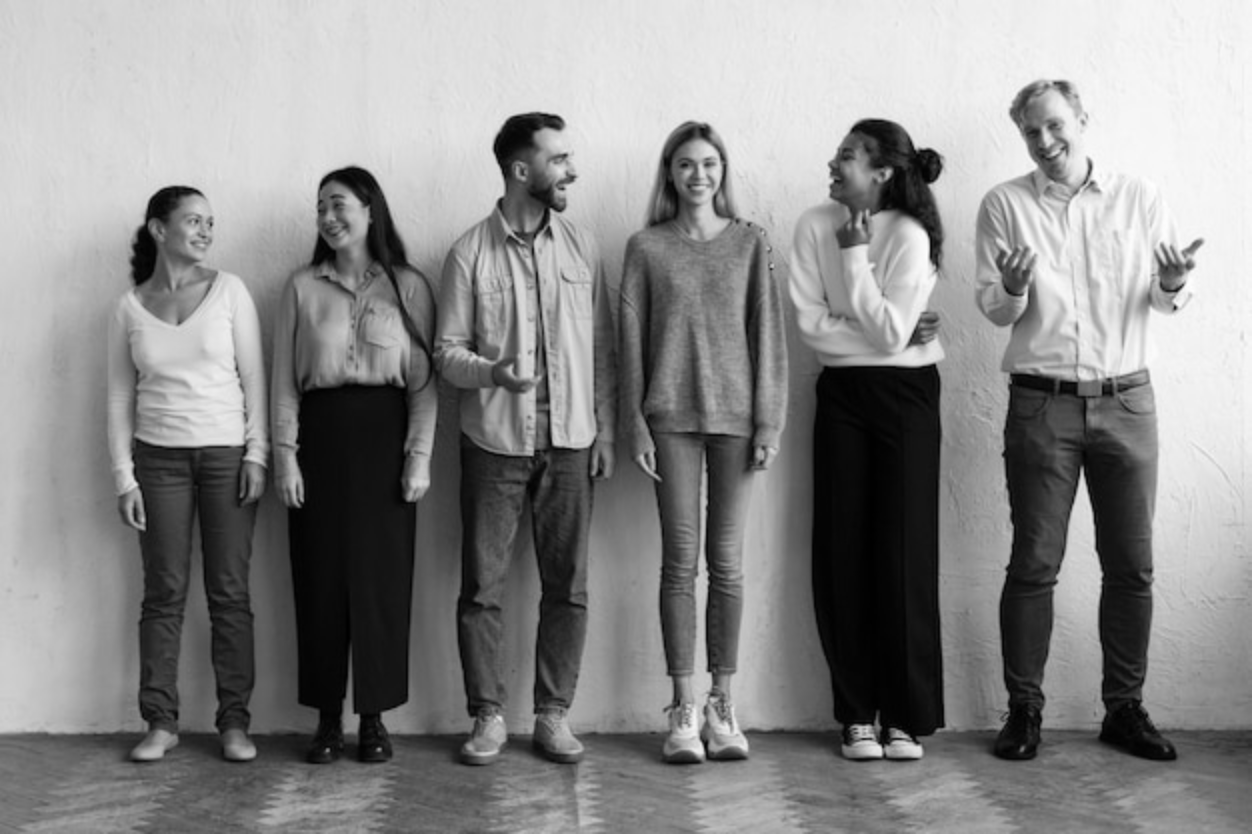

In [5]:
# detecting face
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(image_gray)
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

1032 98 69 69
665 138 66 66
534 127 79 79
311 179 69 69
171 197 62 62


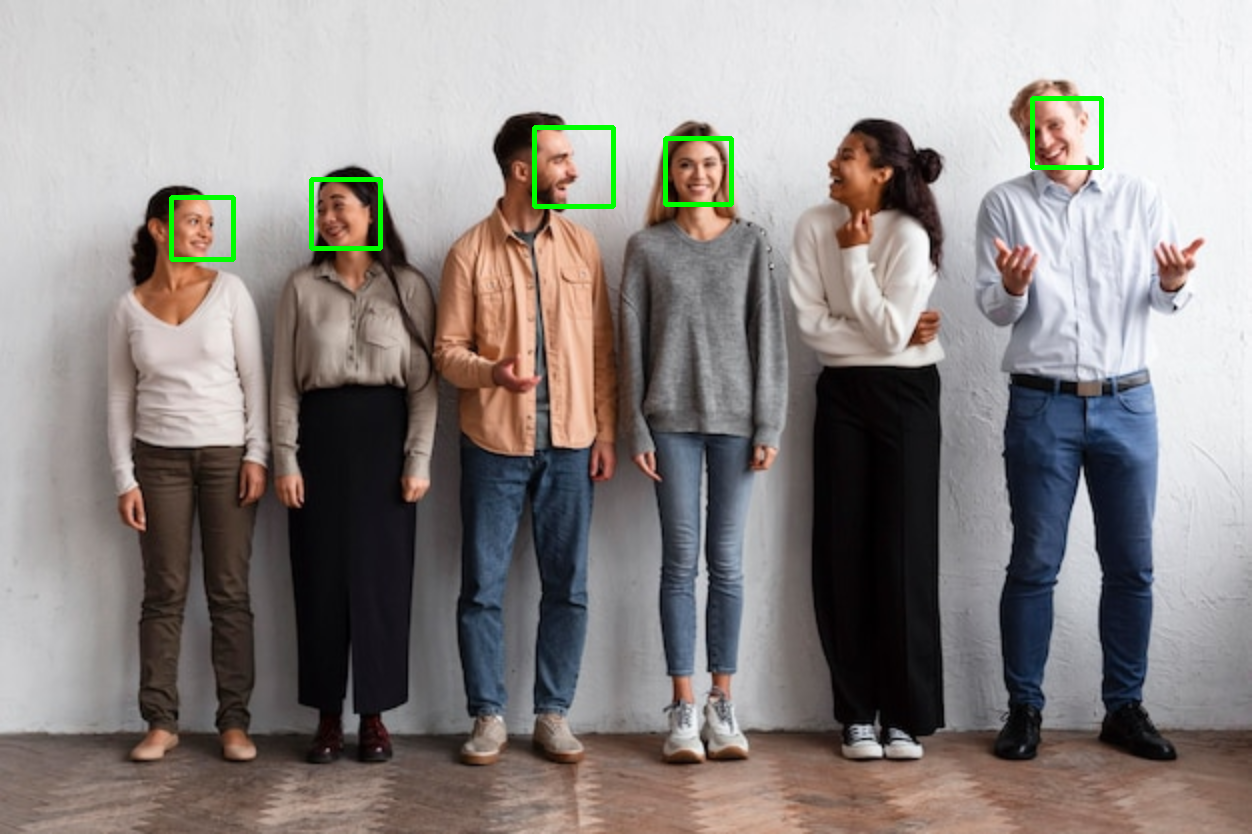

In [6]:
detections = face_detector.detectMultiScale(image_gray, scaleFactor=1.09, minNeighbors=3, minSize=(56, 56))
recImg = image.copy()
for (x, y, w, h) in detections:
  print(x, y, w, h)
  cv2.rectangle(recImg, (x, y), (x + w, y + h), (0,255,0), 3)
cv2_imshow(recImg)

In [7]:
# Eye detection
eye_detector = cv2.CascadeClassifier('haarcascade_eye.xml')

697 153 21 21
507 158 27 27
1046 74 31 31
327 194 21 21
184 210 21 21
1019 112 41 41
1172 249 31 31
816 303 26 26
353 263 23 23
826 305 24 24
307 265 38 38
317 736 27 27


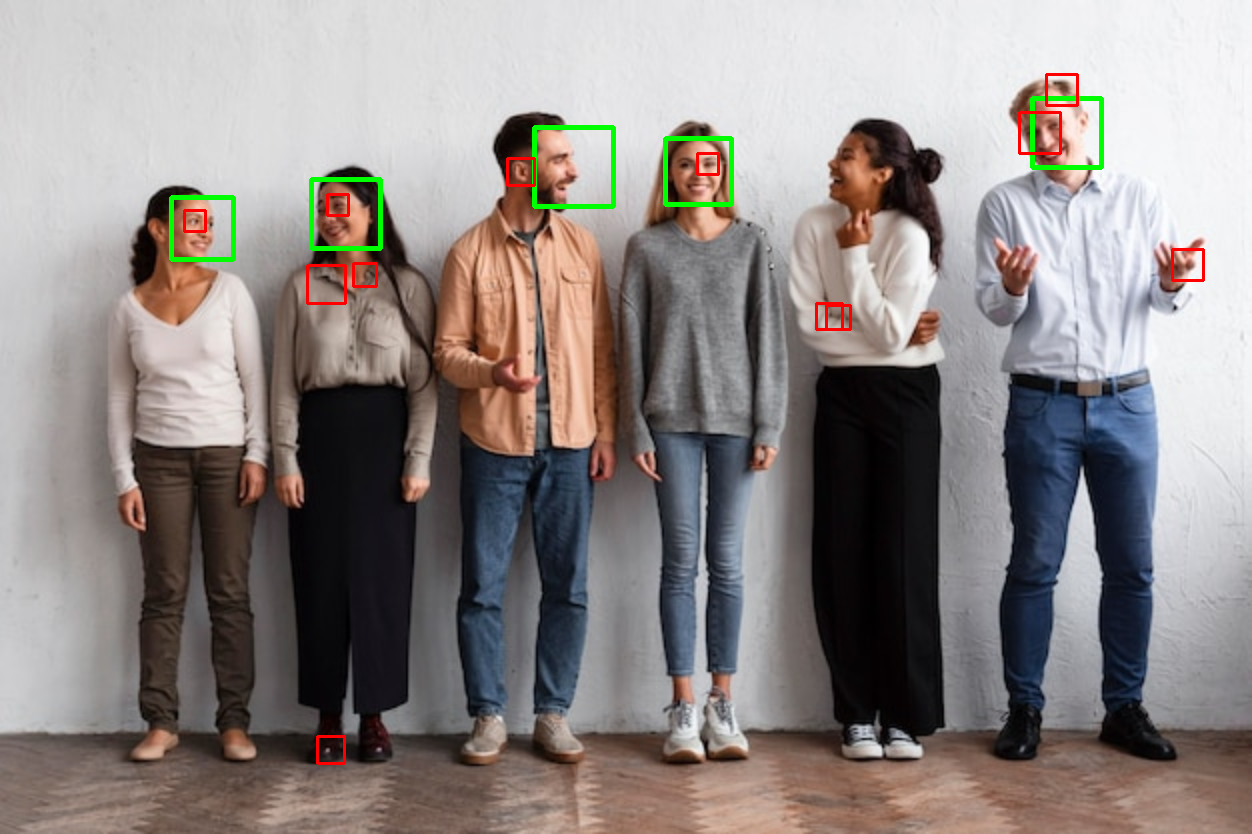

In [8]:
eye_detections = eye_detector.detectMultiScale(image_gray, scaleFactor = 1.03, minNeighbors=6, maxSize=(44,44)) # Adjust parameters to get expected result
recEye = recImg.copy()
for (x, y, w, h) in eye_detections:
  print(x, y, w, h)
  cv2.rectangle(recEye, (x, y), (x + w, y + h), (0,0,255), 2)

cv2_imshow(recEye)